In [1]:
# connect drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Ai_intern/Task_1


/content/drive/MyDrive/Ai_intern/Task_1


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [4]:
# Load the dataset from the uploaded file
data = pd.read_csv('/content/drive/MyDrive/Ai_intern/Task_1/data.csv')  # Replace with the actual path to your CSV file

# Display the first few rows of the dataset
data.head()


,id,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
# Drop any rows with missing or empty values
data.dropna(inplace=True)

# Optionally check for empty 'text' columns
data['text'].replace('', np.nan, inplace=True)
data.dropna(subset=['text'], inplace=True)

# Verify the shape of the dataset after cleaning
print(f"Cleaned dataset shape: {data.shape}")


Cleaned dataset shape: (416809, 3)


In [6]:
# Preprocess the text data: Tokenize and pad sequences
max_vocab_size = 10000  # Vocabulary size
max_sequence_length = 100  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_vocab_size, oov_token="<OOV>")
tokenizer.fit_on_texts(data['text'])

# Convert text to sequences
sequences = tokenizer.texts_to_sequences(data['text'])

# Pad sequences to ensure uniform input size
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')

# Check padded sequences
print(padded_sequences[0])


[   2   32    3   41  286    4 1501 3120    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [7]:
# Encode the sentiment labels (0: sadness, 1: joy, etc.)
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Convert labels to categorical (one-hot encoding for multi-class classification)
labels = tf.keras.utils.to_categorical(data['label'])

# Verify label encoding
print(label_encoder.classes_)


[0 1 2 3 4 5]


In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 333447, Testing samples: 83362


Epoch 1/3
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1109s 106ms/step - accuracy: 0.8158 - loss: 0.4770 - val_accuracy: 0.9372 - val_loss: 0.1064
Epoch 2/3
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1171s 107ms/step - accuracy: 0.9392 - loss: 0.1018 - val_accuracy: 0.9385 - val_loss: 0.0978
Epoch 3/3
10421/10421 ━━━━━━━━━━━━━━━━━━━━ 1211s 112ms/step - accuracy: 0.9415 - loss: 0.0921 - val_accuracy: 0.9404 - val_loss: 0.0916


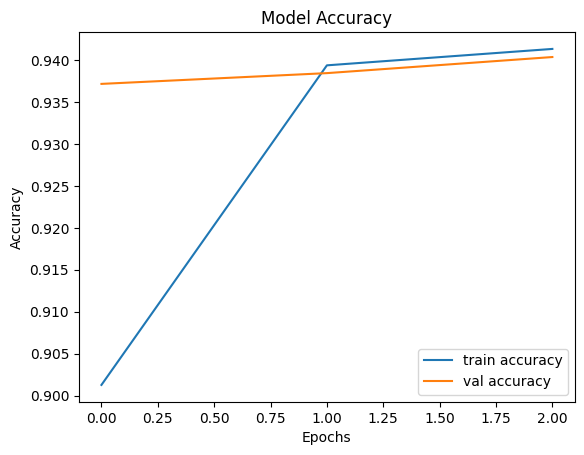

In [10]:
# Train the model
history = model.fit(X_train, y_train, epochs=3, batch_size=32, validation_data=(X_test, y_test))

# Plot accuracy and loss over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [11]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc * 100:.2f}%")


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 75s 29ms/step - accuracy: 0.9397 - loss: 0.0916
Test accuracy: 94.04%


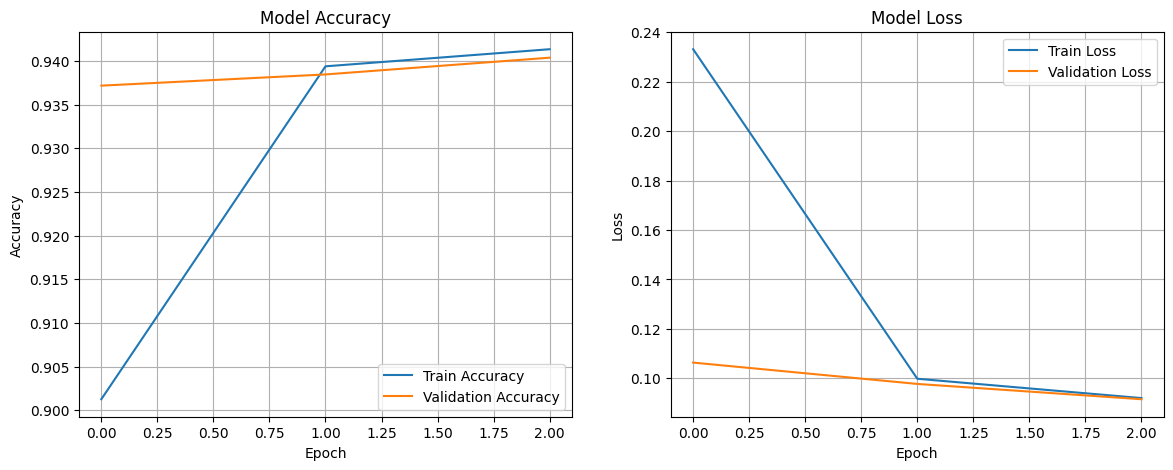

In [12]:
# Save metrics
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting Accuracy and Loss
plt.figure(figsize=(14, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.grid()

plt.show()


In [13]:
# Import necessary libraries for metrics
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Assuming your model is already defined and trained
# Get predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

# Define the class names based on your label mapping
class_names = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

# Generate classification report using class names
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


2606/2606 ━━━━━━━━━━━━━━━━━━━━ 73s 28ms/step
              precision    recall  f1-score   support

     sadness       0.96      1.00      0.98     24201
         joy       0.99      0.92      0.95     28164
        love       0.78      0.98      0.87      6929
       anger       0.95      0.94      0.95     11441
        fear       0.99      0.82      0.89      9594
    surprise       0.74      1.00      0.85      3033

    accuracy                           0.94     83362
   macro avg       0.90      0.94      0.91     83362
weighted avg       0.95      0.94      0.94     83362



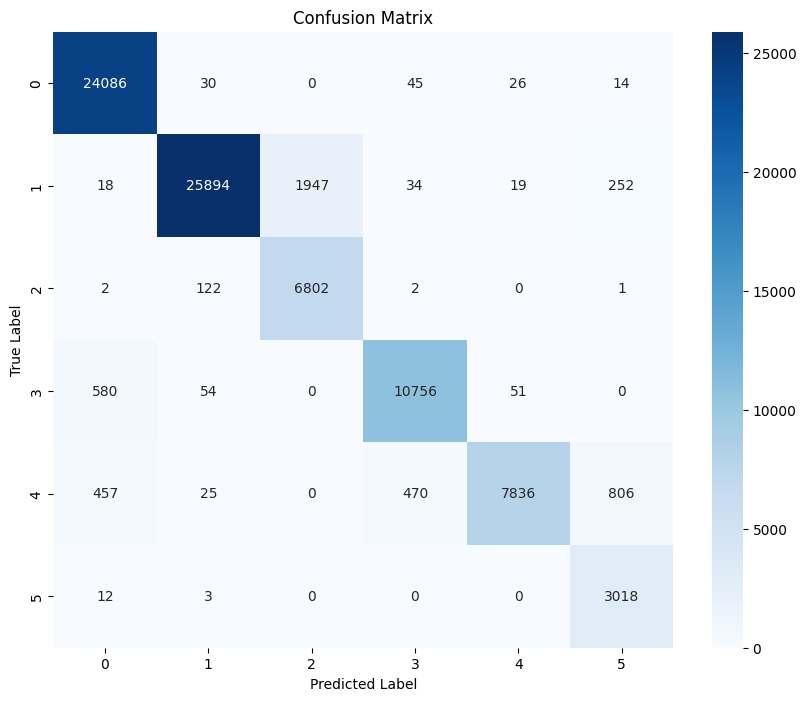

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)

plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<Figure size 1200x600 with 0 Axes>

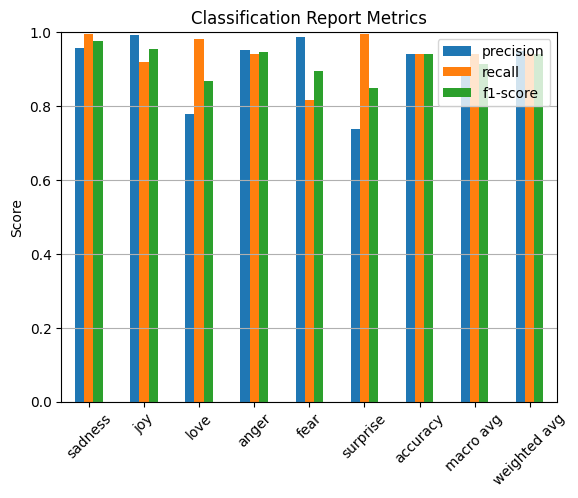

In [15]:
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)

# Convert report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Plotting the metrics
plt.figure(figsize=(12, 6))
report_df[['precision', 'recall', 'f1-score']].plot(kind='bar', legend=True)
plt.title('Classification Report Metrics')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set limit from 0 to 1 for better visibility
plt.grid(axis='y')
plt.show()


In [18]:
# Save the trained model
model.save('/content/drive/MyDrive/Ai_intern/Task_1/sentiment_analysis_model.keras')
